In [1]:
import os

# CONSTANTS
DATASET_DIR = '../dataset'
SAMPLE_RATE = 8000 # 8 kHz sample rate; we downsampled because we want 4KHz — making the model more robust against noise in the higher frequencies.
IMAGE_HEIGHT = 500
IMAGE_WIDTH = 157
SPLIT_SECOND = 10 # second
WAVE_SAMPLE_LENGTH = int(SAMPLE_RATE * 0.25)
SAMPLE_LENGTH = SAMPLE_RATE * 10

dialects = os.listdir(DATASET_DIR + '/dialects')
dialects

['Banten',
 'Banyumas',
 'Cirebon',
 'Kediri',
 'Lumajang',
 'Madiun',
 'Malang',
 'Ngadas',
 'Osing',
 'Papua',
 'Pemalang',
 'Ranu Pane',
 'Semarang',
 'Solo',
 'Tegal',
 'Tengger']

In [2]:
wavs = dict()

for dialect in dialects:
    wavs[dialect] = [wav for wav in os.listdir(DATASET_DIR + '/dialects/' + dialect) if wav[-3:] == 'wav']

wavs

{'Banten': ['banten-2010-07-02-a.wav',
  'JWB-20070129.wav',
  'JWB-20090116.wav',
  'JWB-20090117.wav',
  'JWB-20090118.wav',
  'JWB-20090120.wav',
  'JWB-20090122.wav',
  'JWB-20090123.wav',
  'JWB-20090124.wav',
  'JWB-20090125.wav',
  'JWB-20090126.wav',
  'JWB-20090127.wav',
  'JWB-20090130.wav',
  'JWB-20090131.wav',
  'JWB-Banten20100605-A.wav',
  'JWB-Banten20100605-B.wav',
  'JWB-Banten_1.wav',
  'JWB-Banten_10.wav',
  'JWB-Banten_11.wav',
  'JWB-Banten_19.wav',
  'JWB-Banten_2.wav',
  'JWB-Banten_3.wav',
  'JWB-Banten_4.wav',
  'JWB-Banten_5.wav',
  'JWB-Banten_6.wav',
  'JWB-Banten_7.wav',
  'JWB-Banten_8.wav',
  'JWB-Banten_9.wav',
  'JWBA-20100703-a.wav',
  'JWBA-20100703-b.wav',
  'JWBP-20121229-A.wav',
  'JWBP-20121229-B.wav',
  'JWBS-20100702-b.wav'],
 'Banyumas': ['JCBB-20060331-A.wav',
  'JCBB-20060331-B.wav',
  'JCBB-20060331-C.wav',
  'JCBB-20060401.wav',
  'JCBB-20060809-A.wav',
  'JCBB-20060809-B.wav',
  'JCBB-20060810-A.wav',
  'JCBB-20060810-B.wav',
  'JCBC-2006

In [3]:
# Loading our example audio
import librosa

_ = librosa.load(
    "E:/medhok/dataset/dialects/Banten/JWB-20090117.wav",
    sr=SAMPLE_RATE,
    mono=True
)[0]

In [4]:
_

array([0.        , 0.        , 0.        , ..., 0.07184704, 0.08652782,
       0.        ], dtype=float32)

In [5]:
_.shape

(11124737,)

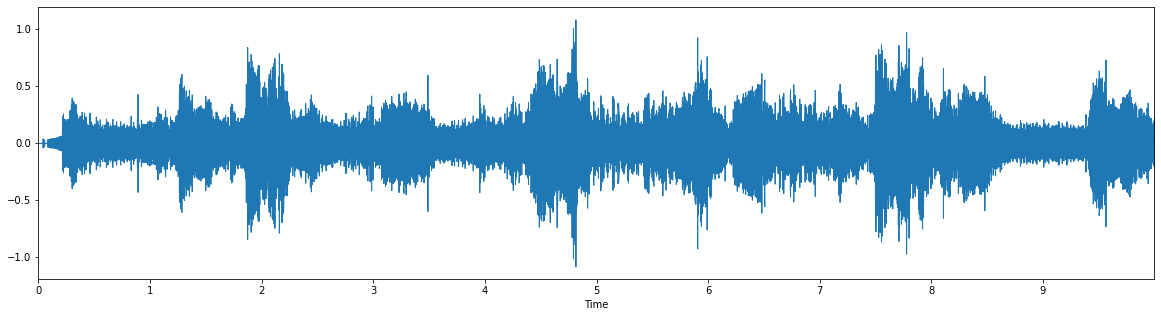

In [6]:
from matplotlib import pyplot as plt
from librosa import display

plt.figure(figsize=(20,5))
display.waveplot(_[:SAMPLE_LENGTH], sr=SAMPLE_RATE)

plt.show()

In [7]:
# Audio splitting: .25 seconds
_segment = _[:SAMPLE_LENGTH]

In [8]:
_segment

array([0.        , 0.        , 0.        , ..., 0.22255474, 0.22708367,
       0.2257466 ], dtype=float32)

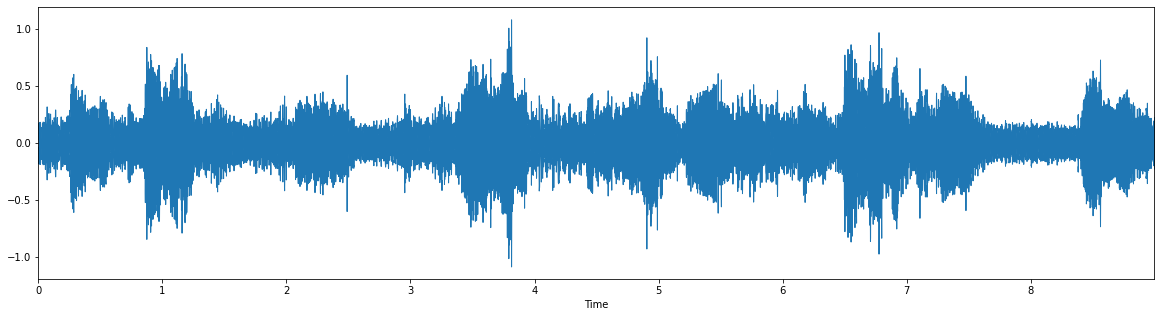

In [10]:
# Audio sample visualization
from matplotlib import pyplot as plt
from librosa import display

plt.figure(figsize=(20,5))
librosa.display.waveplot(_segment[SAMPLE_RATE:], sr=SAMPLE_RATE)
plt.show()

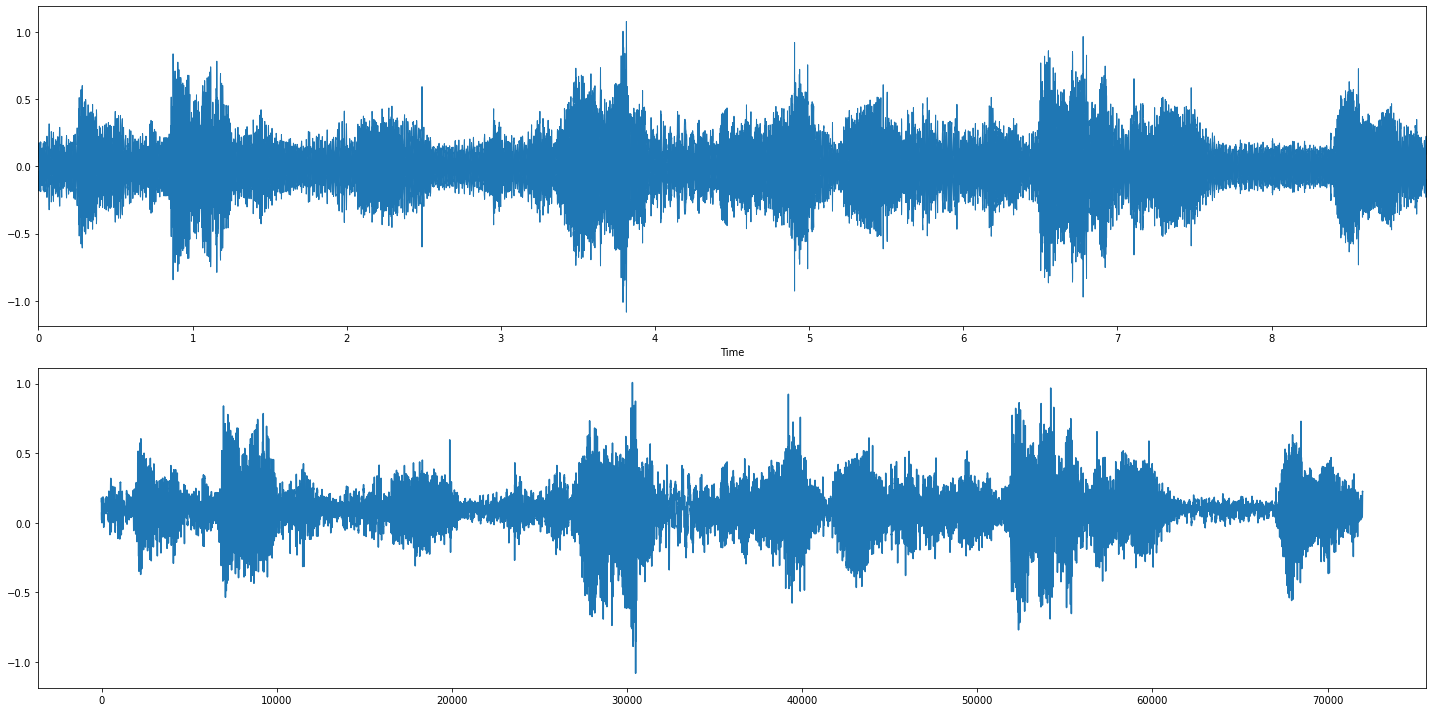

In [11]:
# Waveplot and plot side-by-side illustration
fig, ax = plt.subplots(2, figsize=(20, 10))
librosa.display.waveplot(_segment[SAMPLE_RATE:], sr=SAMPLE_RATE, ax=ax[0])
ax[1].plot(_segment[SAMPLE_RATE:])

plt.tight_layout()
plt.savefig('../visualization/plot_vs_wave.png', pad_inches=0)
plt.show()

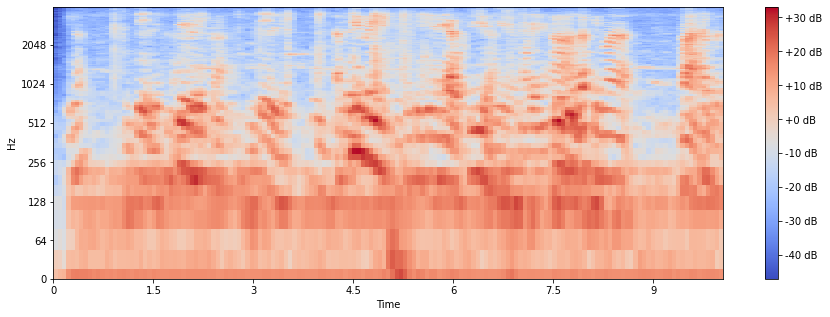

In [12]:
# Audio Mel Spectrogram

# _spectrogram = librosa.feature.melspectrogram(_[0], sr=SAMPLE_RATE, hop_length=int(_[0].shape[0]))
_mel_spectrogram = librosa.feature.melspectrogram(_segment, sr=SAMPLE_RATE)
_mel_spectrogram_image = librosa.core.power_to_db(_mel_spectrogram)

plt.figure(figsize=(15, 5))
librosa.display.specshow(_mel_spectrogram_image, sr=SAMPLE_RATE, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.savefig('../visualization/mel_spec.png')
plt.show()

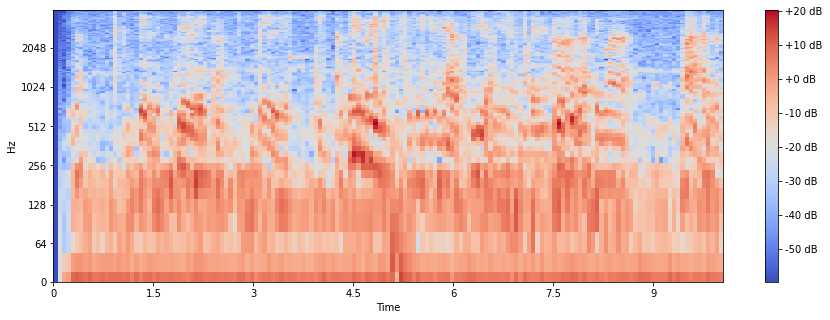

In [13]:
_mel_spectrogram = librosa.feature.melspectrogram(_segment, sr=SAMPLE_RATE, n_fft=400)
_mel_spectrogram_image = librosa.core.power_to_db(_mel_spectrogram)

plt.figure(figsize=(15, 5))
librosa.display.specshow(_mel_spectrogram_image, sr=SAMPLE_RATE, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.savefig('../visualization/mel_spec_fft400')
plt.show()

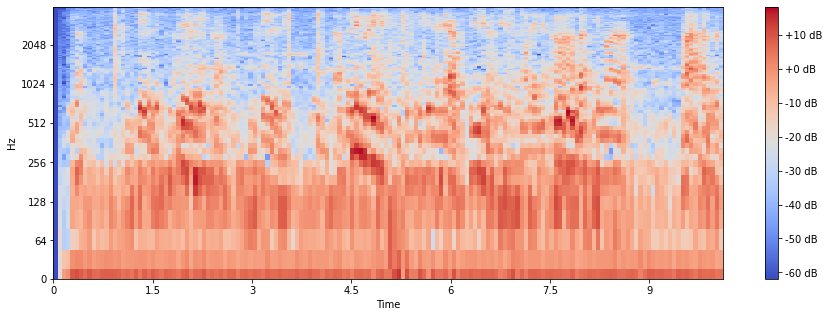

In [14]:
_mel_spectrogram = librosa.feature.melspectrogram(_segment, sr=SAMPLE_RATE, n_fft=400, hop_length=_segment.shape[0]//IMAGE_WIDTH)
_mel_spectrogram_image = librosa.core.power_to_db(_mel_spectrogram)

plt.figure(figsize=(15, 5))
librosa.display.specshow(_mel_spectrogram_image, sr=SAMPLE_RATE, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

plt.savefig('../visualization/mel_spec_fft400_w157.png')
plt.show()

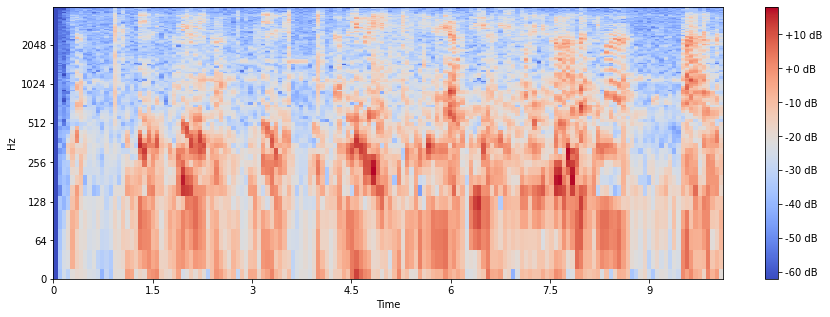

In [15]:
_mel_spectrogram = librosa.feature.melspectrogram(_segment, sr=SAMPLE_RATE, n_fft=400, hop_length=_segment.shape[0]//IMAGE_WIDTH, fmin=200, fmax=4000)
_mel_spectrogram_image = librosa.core.power_to_db(_mel_spectrogram)

plt.figure(figsize=(15, 5))
librosa.display.specshow(_mel_spectrogram_image, sr=SAMPLE_RATE, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

plt.savefig('../visualization/mel_spec_fft400_w157_200-4000hz.png')
plt.show()

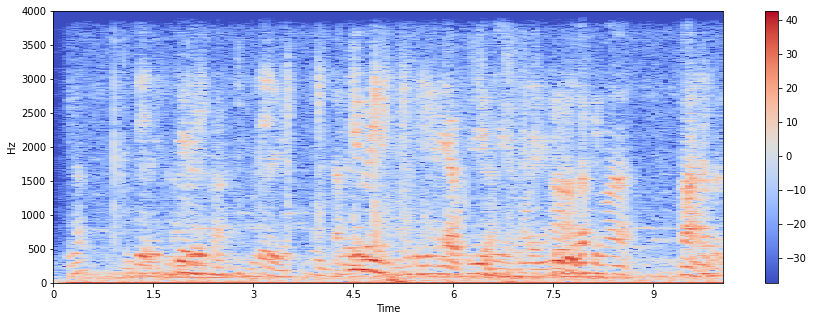

In [16]:
# Spectrogram
_spectrogram = librosa.core.stft(_segment)
_spectrogram_db = librosa.amplitude_to_db(abs(_spectrogram))

plt.figure(figsize=(15, 5))
librosa.display.specshow(_spectrogram_db, sr=SAMPLE_RATE, x_axis='time', y_axis='hz')
plt.colorbar()

plt.savefig('../visualization/spec.png')
plt.show()

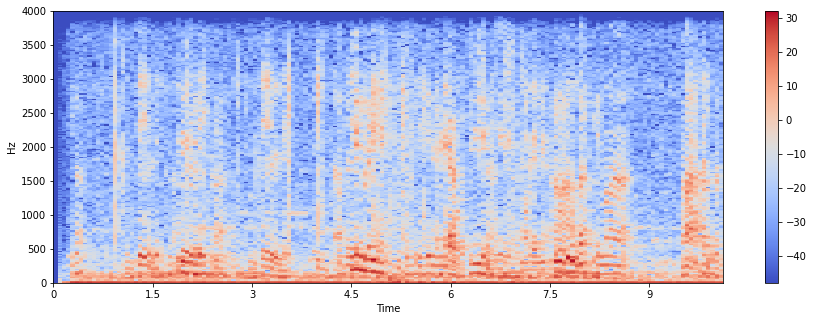

In [17]:
_spectrogram = librosa.core.stft(_segment, n_fft=400, hop_length=_segment.shape[0] // IMAGE_WIDTH)
_spectrogram_db = librosa.amplitude_to_db(abs(_spectrogram))

plt.figure(figsize=(15, 5))
librosa.display.specshow(_spectrogram_db, sr=SAMPLE_RATE, x_axis='time', y_axis='hz')
plt.colorbar()

plt.savefig('../visualization/spec_fft400_w157.png')
plt.show()

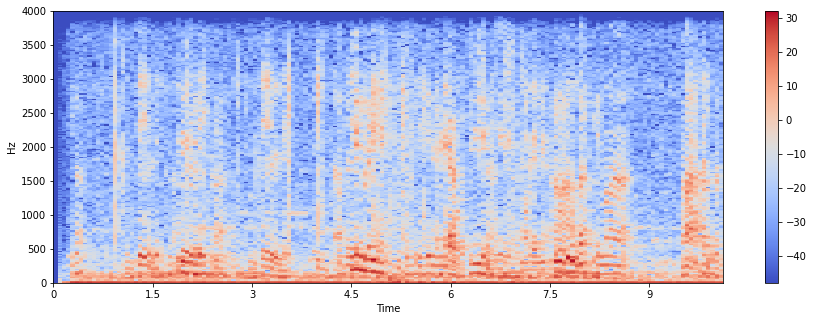

In [18]:
_spectrogram = librosa.core.stft(_segment, n_fft=400, hop_length=_segment.shape[0] // IMAGE_WIDTH, win_length=400)
_spectrogram_db = librosa.amplitude_to_db(abs(_spectrogram))

plt.figure(figsize=(15, 5))
librosa.display.specshow(_spectrogram_db, sr=SAMPLE_RATE, x_axis='time', y_axis='hz')
plt.colorbar()

plt.savefig('../visualization/spec_fft400_w157_wl400.png')
plt.show()

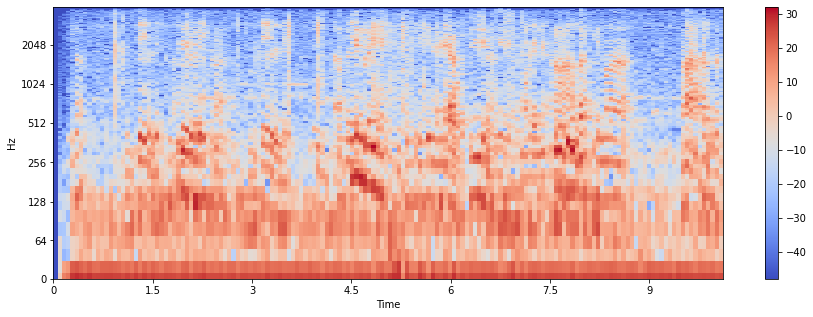

In [19]:
# Spectrogram - log-adjusted

plt.figure(figsize=(15, 5))
librosa.display.specshow(_spectrogram_db, sr=SAMPLE_RATE, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

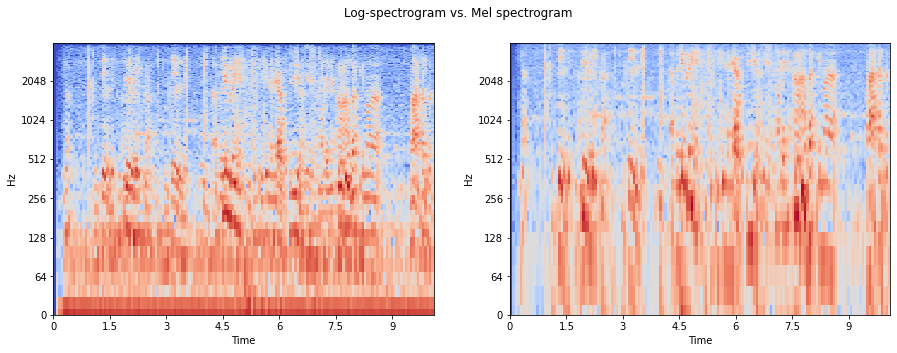

In [23]:
# Log spectrogram vs. Mel spectrogram
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Log-spectrogram vs. Mel spectrogram')
librosa.display.specshow(_spectrogram_db, sr=SAMPLE_RATE, x_axis='time', y_axis='log', ax=ax[0])
librosa.display.specshow(_mel_spectrogram_image, sr=SAMPLE_RATE, x_axis='time', y_axis='log', ax=ax[1])

plt.show()

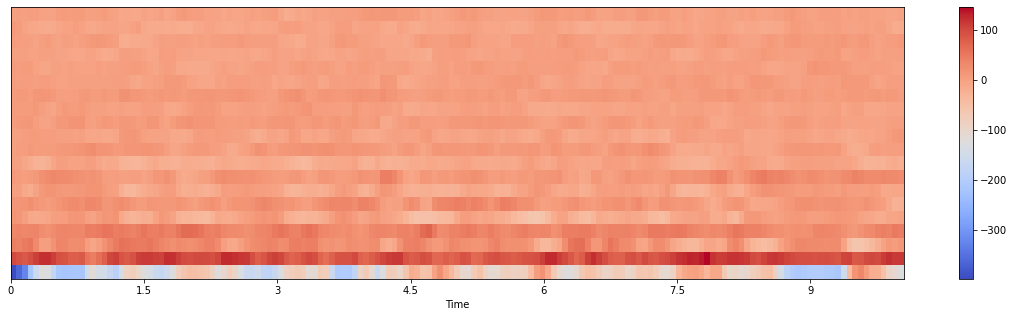

In [24]:
_mfcc = librosa.feature.mfcc(_segment, sr=SAMPLE_RATE)

plt.figure(figsize=(20, 5))
librosa.display.specshow(_mfcc, sr=SAMPLE_RATE, x_axis='time')
plt.colorbar()

plt.savefig('../visualization/mfcc.png')
plt.show()

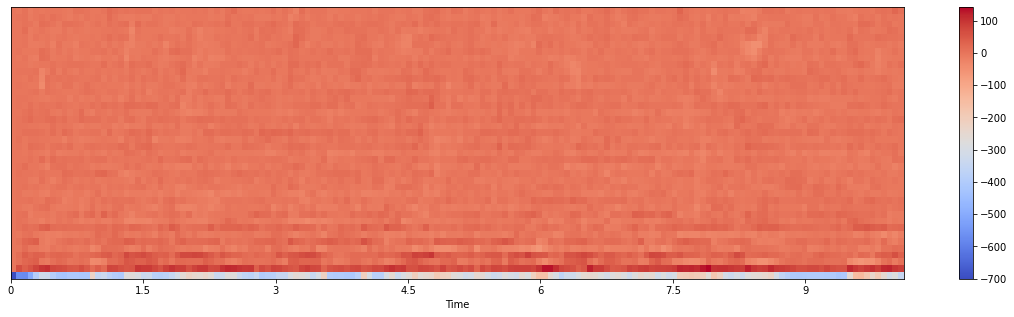

In [25]:
_mfcc = librosa.feature.mfcc(_segment, sr=SAMPLE_RATE, n_fft=400, hop_length= _segment.shape[0] // IMAGE_WIDTH, n_mfcc=40, fmin=200, fmax=4000)

plt.figure(figsize=(20, 5))
librosa.display.specshow(_mfcc, sr=SAMPLE_RATE, x_axis='time')
plt.colorbar()

plt.savefig('../visualization/mfcc_shon2018.png')
plt.show()

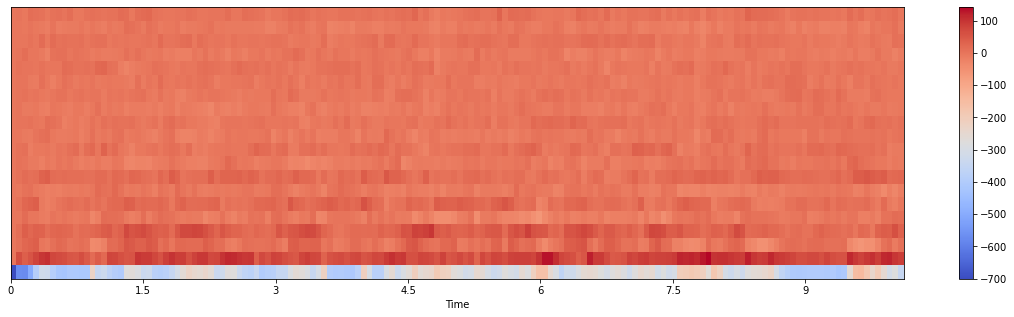

In [26]:
# MFCC from Mel spectrogram

_mfcc_from_mel_spectrogram = librosa.feature.mfcc(S=_mel_spectrogram_image)

plt.figure(figsize=(20, 5))
librosa.display.specshow(_mfcc_from_mel_spectrogram, sr=SAMPLE_RATE, x_axis='time')
plt.colorbar()

plt.savefig('../visualization/mfcc_from_spectrogram.png')
plt.show()

In [27]:
# Voice Activity Detection - courtesy of Shon et al., (2018)
import numpy as np

_rmse = librosa.feature.rms(_segment, frame_length=400, hop_length=_segment.shape[0] // IMAGE_WIDTH)
threshold = np.mean(_rmse) / 2 * 1.04
vad_segments = np.nonzero(_rmse > threshold)

In [31]:
print(_rmse)

[[4.42031451e-05 1.84932984e-02 3.38143855e-02 6.21848144e-02
  1.28892168e-01 1.73700973e-01 1.35996193e-01 1.29150242e-01
  1.28891781e-01 1.19420506e-01 1.12680726e-01 1.10975869e-01
  1.07664421e-01 1.19828574e-01 1.05445035e-01 1.12120524e-01
  1.12305939e-01 1.33309409e-01 1.35072470e-01 1.20701358e-01
  2.22879827e-01 1.93643883e-01 1.32687598e-01 1.58784688e-01
  1.77735478e-01 1.20232932e-01 1.18617252e-01 1.54500440e-01
  1.21128075e-01 1.71498731e-01 2.92045295e-01 2.39289373e-01
  2.26793781e-01 3.01639706e-01 2.60965556e-01 1.80245757e-01
  1.32852197e-01 1.37146667e-01 1.56863183e-01 1.31179169e-01
  1.16289496e-01 1.05245836e-01 1.06259830e-01 1.08609393e-01
  1.20079875e-01 1.17480814e-01 1.41503721e-01 1.48240745e-01
  1.14357002e-01 1.41707659e-01 1.54996693e-01 1.63986579e-01
  1.74517319e-01 1.64525703e-01 1.48212314e-01 1.27509370e-01
  1.01389989e-01 9.66353267e-02 1.06492482e-01 9.64075625e-02
  1.10574119e-01 1.00997098e-01 1.34142205e-01 1.26366556e-01
  1.0892

In [35]:
print(_rmse > threshold)

[[False False False False  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True]]


In [39]:
# overflow stuff
_of = librosa.load('../dataset/dialects/Banten/JWB-20090122.wav', res_type='soxr_qq')[0]
fig = plt.figure(figsize=(100, 8))
ax = fig.add_subplot(1, 1, 1)
display.waveplot(_of, sr=SAMPLE_RATE, ax=ax)
fig.tight_layout()
fig.savefig('../visualization/Banten/'+'overflow'+'.png', pad_inches=0)
plt.close(fig)

plt.show()

OverflowError: In draw_markers: Exceeded cell block limit

OverflowError: In draw_markers: Exceeded cell block limit

<Figure size 7200x576 with 1 Axes>

In [2]:
import matplotlib

matplotlib.rcsetup.all_backends

['GTK3Agg',
 'GTK3Cairo',
 'GTK4Agg',
 'GTK4Cairo',
 'MacOSX',
 'nbAgg',
 'QtAgg',
 'QtCairo',
 'Qt5Agg',
 'Qt5Cairo',
 'TkAgg',
 'TkCairo',
 'WebAgg',
 'WX',
 'WXAgg',
 'WXCairo',
 'agg',
 'cairo',
 'pdf',
 'pgf',
 'ps',
 'svg',
 'template']